In [11]:
using CSV, DataFrames, Plots
data = CSV.read("Mumby_Hastings_sim_data.csv",DataFrame)
data = data[:,2:end]
training_data = data[1:3:(end-20),:]
test_data = data[(end-20):3:end,:]
data[1:6,:]
X = DataFrame(t = data.t, series = data.series, X = zeros(length(data.t)))
X[1:6,:]

Row,t,series,X
,Int64,Int64,Float64
1,1,1,0.0
2,2,1,0.0
3,3,1,0.0
4,4,1,0.0
5,5,1,0.0
6,6,1,0.0


In [12]:
include("../src/UniversalDiffEq.jl")

┌ Warning: Error requiring `Enzyme` from `LinearSolve`
│   exception = (LoadError("/Users/johnbuckner/.julia/packages/LinearSolve/qCLK7/ext/LinearSolveEnzymeExt.jl", 1, ArgumentError("Package LinearSolve does not have Enzyme in its dependencies:\n- If you have LinearSolve checked out for development and have\n  added Enzyme as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with LinearSolve")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00000001175fb299, Ptr{Nothing} @0x000000010e1e3f50, Ptr{Nothing} @0x000000010e217bac, Ptr{Nothing} @0x000000010e21694f, Ptr{Nothing} @0x000000010e217165, Ptr{Nothing} @0x000000010e216d72, Ptr{Nothing} @0x000000010e218045, Ptr{Nothing} @0x000000011ba43d9a, Ptr{Nothing} @0x000000010e1e3f50, Ptr{Nothing} @0x000000011bb058b5, Ptr{Nothing} @0x000000011b673bb5, Ptr{Nothing} @0x000000010e1e3f50, Ptr{Nothing} @0x000000010e1f0d3a, Ptr{Nothing} @0x00000001

Main.UniversalDiffEq

In [44]:
model_1 = UniversalDiffEq.MultiNODESimplex(training_data,X,obs_weight = 0.25,proc_weight = 5.0, reg_weight = 10.0^-3.5, reg_type = "L2")
nothing

In [45]:
model_1.loss_function(model_1.parameters)

13.294581232745935

In [46]:
UniversalDiffEq.gradient_decent!(model_1,verbos = true,maxiter=200,step_size = 0.1) 

13.295 13.043 13.144 12.622 12.486 12.351 12.199 12.044 11.896 11.758 11.625 11.493 11.359 11.223 11.085 10.943 10.796 10.673 10.503 10.318 10.177 9.96 9.817 9.606 9.464 9.238 9.082 8.925 8.761 8.633 8.461 8.316 8.145 8.009 7.873 7.737 7.617 7.472 7.352 7.221 7.105 6.986 6.858 6.741 6.624 6.512 6.403 6.287 6.181 6.077 5.973 5.873 5.772 5.673 5.58 5.485 5.39 5.301 5.213 5.124 5.038 4.954 4.87 4.789 4.709 4.63 4.553 4.478 4.403 4.33 4.257 4.188 4.12 4.053 3.99 3.93 3.878 3.811 3.738 3.665 3.613 3.564 3.495 3.431 3.382 3.33 3.271 3.212 3.163 3.118 3.067 3.015 2.96 2.91 2.865 2.823 2.784 2.741 2.7 2.646 2.596 2.554 2.517 2.48 2.435 2.391 2.354 2.319 2.282 2.241 2.203 2.169 2.136 2.101 2.066 2.031 1.997 1.965 1.933 1.902 1.872 1.844 1.821 1.801 1.788 1.743 1.697 1.673 1.655 1.621 1.588 1.572 1.546 1.512 1.493 1.472 1.44 1.418 1.4 1.373 1.347 1.327 1.309 1.288 1.262 1.241 1.222 1.204 1.185 1.163 1.142 1.124 1.107 1.089 1.07 1.051 1.034 1.018 1.003 0.986 0.97 0.954 0.937 0.922 0.906 0.891 0.8

In [47]:
UniversalDiffEq.gradient_decent!(model_1,verbos = true,maxiter=150,step_size = 0.05) 


0.509 1.179 0.54 0.609 0.732 0.657 0.499 0.479 0.501 0.523 0.496 0.461 0.443 0.432 0.421 0.413 0.41 0.404 0.388 0.369 0.359 0.36 0.361 0.353 0.34 0.33 0.323 0.317 0.311 0.308 0.305 0.298 0.289 0.282 0.278 0.274 0.269 0.264 0.259 0.253 0.248 0.244 0.241 0.237 0.232 0.227 0.223 0.219 0.215 0.212 0.208 0.204 0.2 0.196 0.193 0.19 0.186 0.183 0.179 0.176 0.173 0.17 0.167 0.164 0.161 0.159 0.156 0.153 0.15 0.148 0.145 0.143 0.14 0.138 0.135 0.133 0.131 0.129 0.126 0.124 0.122 0.12 0.118 0.116 0.114 0.112 0.11 0.109 0.107 0.105 0.103 0.102 0.1 0.098 0.097 0.095 0.094 0.092 0.091 0.089 0.088 0.086 0.085 0.084 0.083 0.081 0.08 0.079 0.078 0.076 0.075 0.074 0.073 0.073 0.074 0.08 0.094 0.083 0.069 0.081 0.069 0.071 0.072 0.064 0.07 0.062 0.067 0.061 0.062 0.061 0.059 0.06 0.056 0.058 0.055 0.057 0.054 0.054 0.053 0.052 0.052 0.05 0.051 0.049 0.049 0.048 0.048 0.048 0.046 0.046 0.046 

In [48]:
UniversalDiffEq.gradient_decent!(model_1,verbos = true,maxiter=100,step_size = 0.01) 

0.046 0.117 0.05 0.061 0.085 0.073 0.052 0.045 0.054 0.063 0.061 0.051 0.044 0.045 0.05 0.053 0.051 0.046 0.043 0.044 0.046 0.048 0.046 0.043 0.042 0.042 0.044 0.044 0.043 0.041 0.041 0.041 0.042 0.042 0.041 0.04 0.04 0.04 0.04 0.04 0.039 0.039 0.039 0.039 0.039 0.038 0.038 0.038 0.038 0.038 0.038 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.035 0.035 0.035 0.035 0.035 0.035 0.035 0.035 0.035 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.032 0.032 0.032 0.032 0.032 

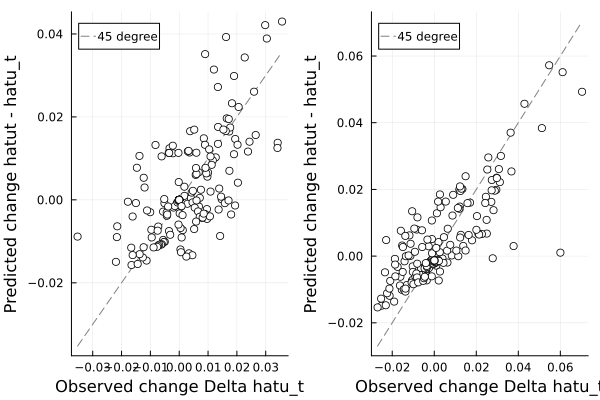

In [49]:
UniversalDiffEq.plot_predictions(model_1)

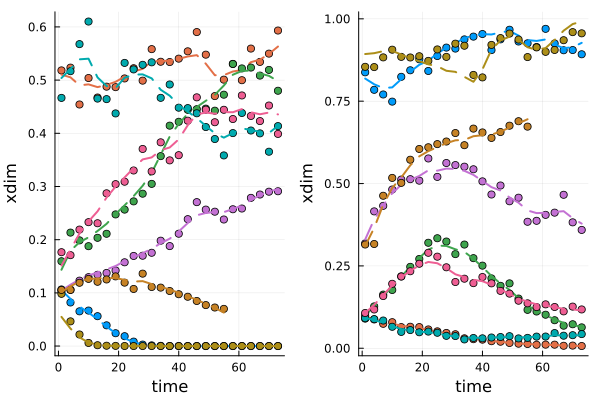

In [50]:
UniversalDiffEq.plot_state_estiamtes(model_1)

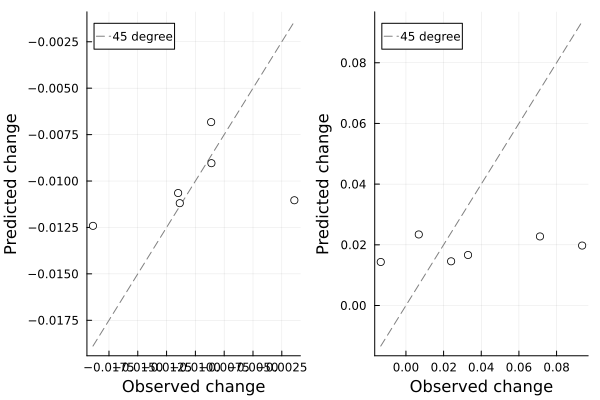

In [51]:
UniversalDiffEq.plot_predictions(model_1, test_data)

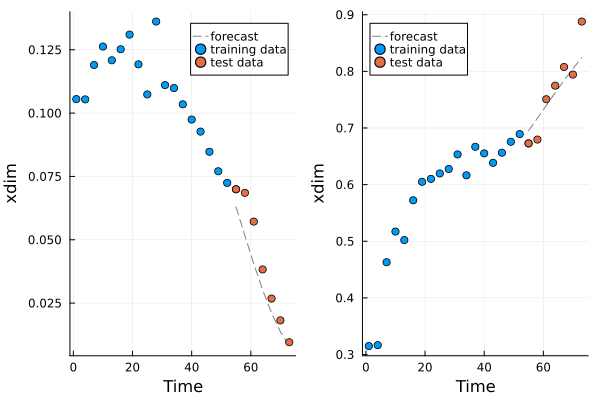

In [52]:
UniversalDiffEq.plot_forecast(model_1, test_data)

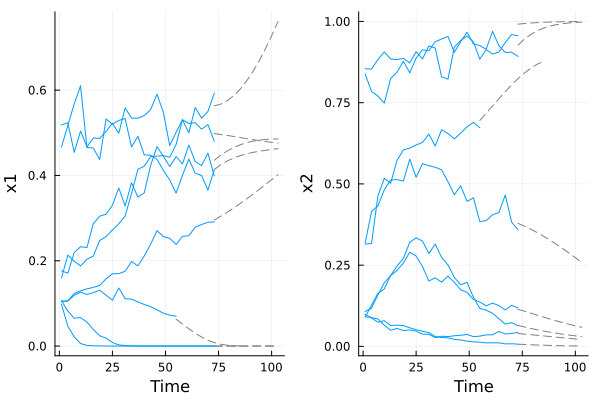

In [53]:
UniversalDiffEq.plot_forecast(model_1, 10)

In [54]:
init, ob, pred = UniversalDiffEq.predictions(model_1)

([0.10517014097219708 0.08862924100074039 … 0.0794862797083195 0.07183334032951327; 0.8187467528634689 0.8012975782105624 … 0.6700589214426275 0.682955461956105], [0.08862924100074039 0.07421692546396651 … 0.07183334032951327 0.06294314298449258; 0.8012975782105624 0.7899321873595511 … 0.682955461956105 0.6952038327197193], [0.0894562085149743 0.07316660986706315 … 0.06816509788750479 0.06036838388948524; 0.8155046590685976 0.8013486374746366 … 0.6902646180166141 0.7038579038464969])

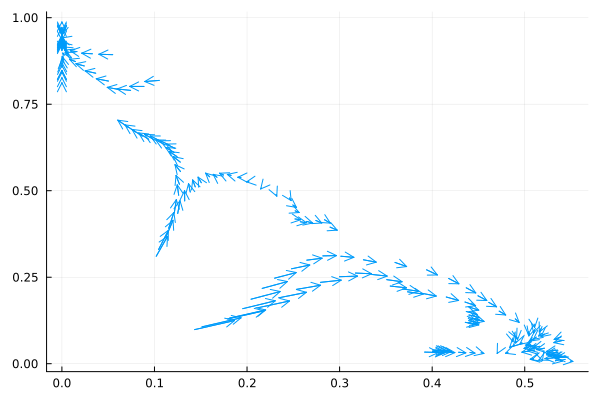

In [55]:
quiver(init[1,:], init[2,:], quiver=(pred[1,:].-init[1,:],pred[2,:].-init[2,:]))

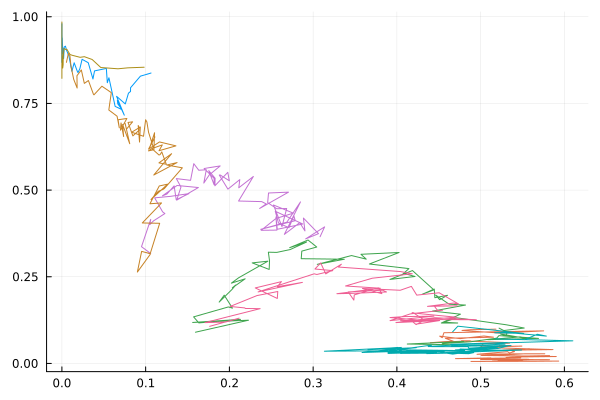

In [56]:
Plots.plot(data.algae,data.coral,group=data.series,label = "")